In [1]:
"""Created on Mon Jul 16 2020 @authors: Maira(011), Pakeeza(021), Ali(043)
"""

'Created on Mon Jul 16 2020 @authors: Maira(011), Pakeeza(021), Ali(043)\n'

In [2]:
"""
Loading all the necessary libraries here, 
The first one is used to load the mnist dataset from local machine
tensor flow and keras for building up a network and training
"""
from mlxtend.data import loadlocal_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_data(training_image_path, training_image_labels, testing_image_path,testing_image_label):
    """
    This function loads the data saved in local machine
    It takes the paths as the input parameters and set the global variables as a dataset variable and returns nothing
    """
    try:
        global training_images,training_labels,testing_images,testing_labels
        training_images,  training_labels = loadlocal_mnist(
                images_path=training_image_path, 
                labels_path=training_image_labels)
        testing_images,  testing_labels = loadlocal_mnist(
                images_path=testing_image_path, 
                labels_path=testing_image_label)
    except Exception as ex:
        print(e)

In [4]:
def show_information():
    """
    This is just a optional function to show if the data is loaded correctly
    This basically shows the length, shape and size of images, takes no input parameters since the dataset 
    is set to be a global variable
    """
    
    print("The number of training images are", len(training_images))
    print("The number of testing images are", len(testing_images))
    print("The dimension of training images are", training_images.ndim)
    print("The shape of training images are", training_images.shape)
    print("The type of training images are",training_images.dtype)
    print("The dimension of single training images is",training_images[0].ndim)

In [5]:
def show_pictures():
        """
        The image from testing set is sketched here,
        The images are 1D, so it's necessary to convert them to 2D array before plotting which 
        is being done here
        """
    index_numbers =[3,2,1,51,56,8,66,0,61,9]
    for index in index_numbers:
        try:
            A=np.reshape(testing_images[index], (28,28,))
            digit= A
            plt.imshow(digit, cmap=plt.cm.binary)
            plt.show()
        except IndexError:
            print("This was not a valid index number\nPlease enter between 0-10k")


In [6]:
def create_network():
    """
    This function makes a network, it creates three layers,
    the layers are dense which means they are connected to one another
    First layers output is fed into seconds' input and a network is connected
    It returns the model object for later useage
    """
    model= models.Sequential()
    model.add(layers.Dense(500, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(250, activation='swish'))
    model.add(layers.Dense(10,activation='softmax'))
    return model


In [7]:
def compile_network(network):
    """
    The network is compiled here and the optimizer is set, it takes the netword or model object as an input parameter
    This compiles a whole nural network based on the layers defined earlier
    """
    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [8]:
def categorize():
    """This function categorizes the dataset into 10 categorical representations using a linear array
    The outputs of all labels are now changes to a class, there are 10 classes ranging from 0-9
    The output bits are turned on for contemprory class
    """
    global training_images,training_labels,testing_images,testing_labels
    training_labels = to_categorical(training_labels)
    testing_labels =  to_categorical(testing_labels)


In [9]:
def train_model(network,images,labels, epoch=2, batch=140):
    """The model is being trained here, it takes 4 input but last 2 are not necessary to provide since
    they are already set to their respective values
    """
    try:
        network.fit (images, labels, epochs=epoch, batch_size=batch)
    except Exception as exp:
        print(e)


In [10]:
def calculate_accuracy(network):
    """The accuracy is calulated here, the network or model object is sent as a parameter
    and used a predefined function to evaluate it
    """
    testing_loss, testing_accuracy = network.evaluate(testing_images, testing_labels)
    return testing_loss, testing_accuracy


In [11]:
def sketch_number(index):
    """
    The image from training set sketched here, providing any index from testing dataset
    The images are 1D, so it's necessary to convert them to 2D array before plotting which 
    is being done here
    """
    try:
        A=np.reshape(testing_images[index], (28,28,))
        digit= A
        plt.imshow(digit, cmap=plt.cm.binary)
        plt.show()
        print(testing_labels[index])
    except IndexError:
        print("This was not a valid index number\nPlease enter between 0-10k")


In [12]:
def predict(index):
    """
    A random index of testing image dataset is sent to this function so it can predict the output
    It Prints the digit ranging from 0-9 which the model has predicted
    You can use previously defined sketch function to check wether this prediction is correct
    """
    try:
        digit=network.predict_classes(testing_images)[index]
        print('Model Predicted digit:',digit)
    except IndexError:
        print("This is not a valid index number\nPlease enter between 0-10k")

In [13]:
def  main():
    """Driver function that calls the functions upto creating and compiling a network and also
    training is being done through this function
    takes no input parameters and returns nothing
    shoes output of processings
    """
    print("Loading Data")
    try:
        global network
        train_images_path='train-images.idx3-ubyte'
        train_labels_path='train-labels.idx1-ubyte'
        test_images_path='t10k-images.idx3-ubyte'
        test_labels_path='t10k-labels.idx1-ubyte'
        load_data(train_images_path,train_labels_path ,test_images_path,test_labels_path)
        print("Data is loaded successfully\n\n")
        show_information()
        network=create_network()
        compile_network(network)
        categorize()
        print("\n\nTraining the model\n\n")
        train_model(network,training_images,training_labels, epoch=5, batch=150)
        print("\nFinding Accuray the model\n\n")
        loss,accuracy=calculate_accuracy(network)
    except Exception as e:
        print(e)
  
    

In [14]:
main()

Loading Data
Data is loaded successfully


The number of training images are 60000
The number of testing images are 10000
The dimension of training images are 2
The shape of training images are (60000, 784)
The type of training images are uint8
The dimension of single training images is 1


Training the model


Epoch 1/5
400/400 [==============================] - 9s 22ms/step - loss: 3.2730 - accuracy: 0.8787
Epoch 2/5
400/400 [==============================] - 9s 23ms/step - loss: 0.3170 - accuracy: 0.9339
Epoch 3/5
400/400 [==============================] - 8s 19ms/step - loss: 0.2437 - accuracy: 0.9487
Epoch 4/5
400/400 [==============================] - 8s 19ms/step - loss: 0.1912 - accuracy: 0.9586
Epoch 5/5
400/400 [==============================] - 8s 19ms/step - loss: 0.1639 - accuracy: 0.9649

Finding Accuray the model


313/313 [==============================] - 1s 5ms/step - loss: 0.2604 - accuracy: 0.9615


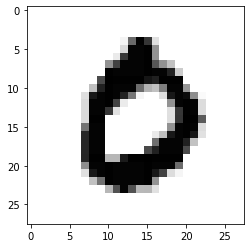

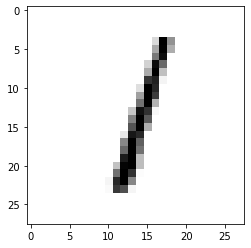

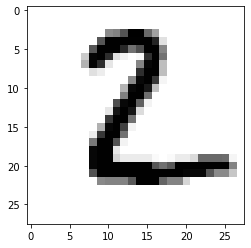

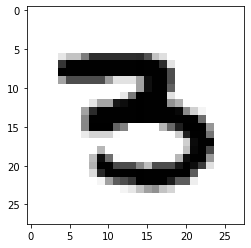

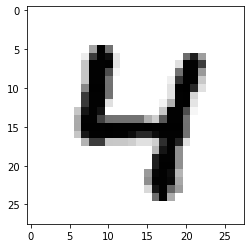

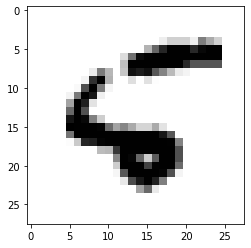

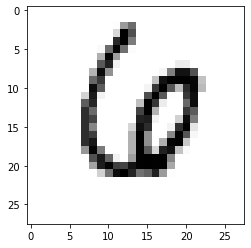

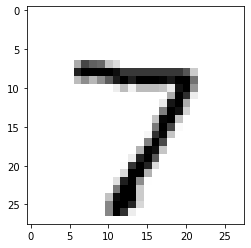

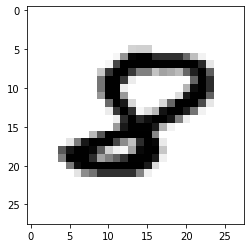

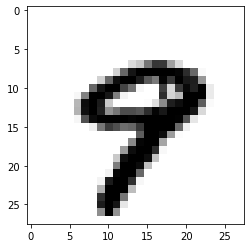

In [15]:
"""Sowing some pictures from loaded data"""
show_pictures()

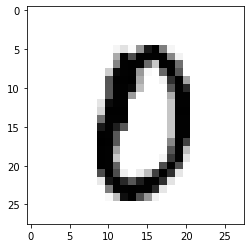

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
"""Predictions are done here, please enter value of the index to look at the image and run the
next cell to check what does python say about that digit"""
index=55
sketch_number(index)

In [18]:
predict(index)

Model Predicted digit: 0
